<a href="https://colab.research.google.com/github/TianXie1999/Deep-Learning-in-OR-FE/blob/main/LinearClassificationExample_WithHiddenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.optimize import minimize
import time
import os

In [ ]:
np.random.seed(1000)

if not os.path.isdir('./figure/LinearClassificationExample_Tanh/'):
    os.makedirs('./figure/LinearClassificationExample_Tanh/')
figure_dir = './figure/LinearClassificationExample_Tanh/'

## Data

In [ ]:
X,Y = np.meshgrid(np.arange(-1,1,0.05),np.arange(-1,2,0.05));
n1 = X.shape[0]
n2 = X.shape[1]
x = np.arange(-1,1,0.05)
y1 = -0.5*np.sin(3*x+np.pi/2)-0.10
y2 = -0.5*np.sin(3*x+np.pi/2)+0.10
#y2 = -0.6*np.sin(3*x+np.pi/2)+1.25

Text(0.5, 1.0, 'Linear Classfication Example Tanh Hidden Layer')

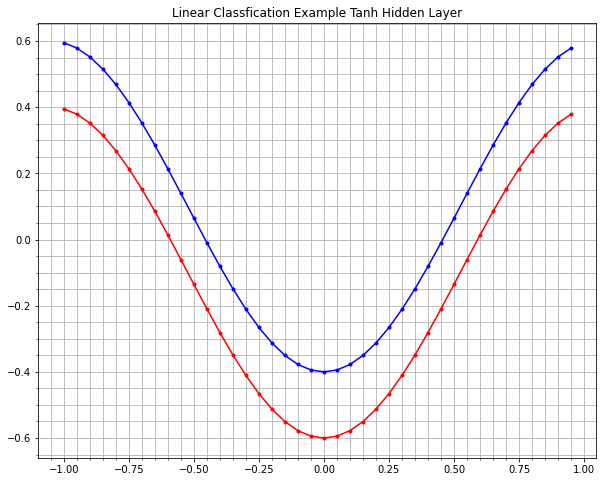

In [ ]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(x, y1, 'r.-')
plt.plot(x, y2, 'b.-')
plt.title('Linear Classfication Example Tanh Hidden Layer')

## Optimization (Simplex)

In [ ]:
# Objective Function (with hidden layer)
def objFunc2(params, X, Y, x, y1, y2, dummy):
    
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    # Loss part one: positive samples
    e = +1*(a*xHat2 + b*yHat2 + c)/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    # Loss part two: negative samples
    e = -1*(a*xHat1 + b*yHat1 + c)/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    
    plt.figure(figsize=(10,10))
    
    for i in np.arange(n1):
        plt.plot(xHat[i,:],yHat[i,:], 'c.-')
    for i in np.arange(n2):
        plt.plot(xHat[:,i],yHat[:,i], 'c.-')
        
    plt.plot(xHat1, yHat1,'b.-')
    plt.plot(xHat2, yHat2,'r.-')
    plt.plot(x, (-c-a*x)/b, 'g-')
    
    plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

    hm = int(time.time()-dummy)
    if hm < 101:
        if hm>0:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+ str(hm-1)+'.png')
        else:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+str(hm)+'.png')
    
    plt.close()
    
    return mae

In [ ]:
# tanh hidden layer
tol = 1e-10

a  = 0.5
b = 1
c = -0.5
w11 = 5
w12 = 2
w21 = 3
w22 = 2
b1  = 0.0
b2  = 0.0
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# Q: optimization routine we are using here
res = minimize(objFunc2, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 374
         Gradient evaluations: 34


In [ ]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)
print(res.x)

[-5.32621402  5.35622968 -0.02929314  6.51498798  3.89179134  2.2025825
  3.75566944 -1.96571387 -0.56893059]


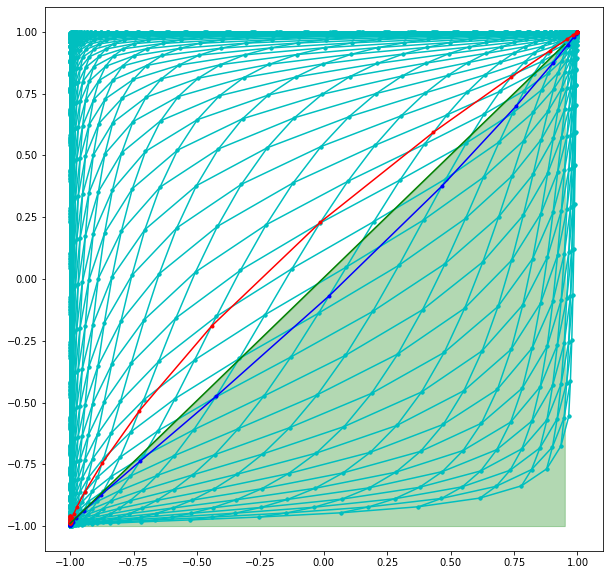

In [ ]:
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)